In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mne

import glob
import os
import sys

sys.path.append('../utils')
from ERP_utils import *

### TO DO: 

make this notebook handle the pre and post data at once without manually setting the period each time
also different musician levels

### Set up 

In [39]:
#-----------------------------
#           PARAMETERS
#-----------------------------
evoked_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data'
epochs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data'
figs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/figures'

good_error_subjects = ['01', '04', '05', '06', '07', '08', '09', '10','11', '12']
musicians = ['05', '06','07', '08','12']
nonmusicians = ['01', '04', '09', '10','11']

subjects_to_process = good_error_subjects
#some promising differences when including just musicians (subjects 5,6,7)


#### TO DO: take equal subsets from each participant?

In [4]:
#-----------------------------
#           GROUPING EVOKEDS
#-----------------------------

conditions = ['all', 'norm', 'shinv', 'inv']
evokeds = {cond: [] for cond in conditions}
epochs = {cond: {'pre': [], 'post': []} for cond in conditions}
periods = ['pre', 'post']
for subject in subjects_to_process:
    print('Processing subject:', subject)
    
    for cond in conditions:
        for period in periods:
            file_evoked = glob.glob(os.path.join(evoked_dir, f'error_ERP_{cond}_{period}_{subject}.fif'))[0]
            evoked = mne.read_evokeds(file_evoked)[0]
            evokeds[cond].append(evoked)
            
            file_epochs = glob.glob(os.path.join(epochs_dir, f'error_epochs_{cond}_{period}_{subject}.fif'))[0]
            epochs[cond][period].append(mne.read_epochs(file_epochs))

# Combine Evokeds
evokeds_ga = {cond: mne.combine_evoked(evokeds[cond], weights='equal') for cond in conditions}

# Concatenate Epochs
concat_epochs = {cond: {period: mne.concatenate_epochs(epochs[cond][period]) for period in ['pre', 'post']} for cond in conditions}

# Combine Evokeds for Pre and Post Data
concat_evoked = {period: {cond: mne.combine_evoked(evokeds[cond], weights='equal') for cond in conditions} for period in ['pre', 'post']}


Processing subject: 01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 289 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
289 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_01.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ER

Not setting metadata
367 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_pre_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_norm_pre_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_pre_04.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_norm_pre_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

69 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 62 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_pre_05.fif ..

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_05.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_05.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/er

Not setting metadata
186 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 189 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_post_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
189 matching events found
No baseline correction applied
0 projection items activated
Processing subject: 07
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_06.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_post_06.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
267 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_post_08.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 325 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_post_08.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
325 matching events found
No baseline correction applied
0 projecti

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_post_08.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_post_08.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_post_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 381 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_post_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
381 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_pre_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
       

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_post_09.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_pre_09.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_post_10.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_norm_post_10.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ER

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_post_10.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_norm_post_10.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/erro

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 101 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/erro

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_11.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_11.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/er

No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_pre_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 143 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_pre_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
143 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_12.fif ...
    Found the data of inte

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_pre_12.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_pre_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_26479/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ER

Not setting metadata
3501 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
842 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
931 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
737 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
823 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1578 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1752 matching events found
Applying baseline correction (mode: mean)


### Plot grand average

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


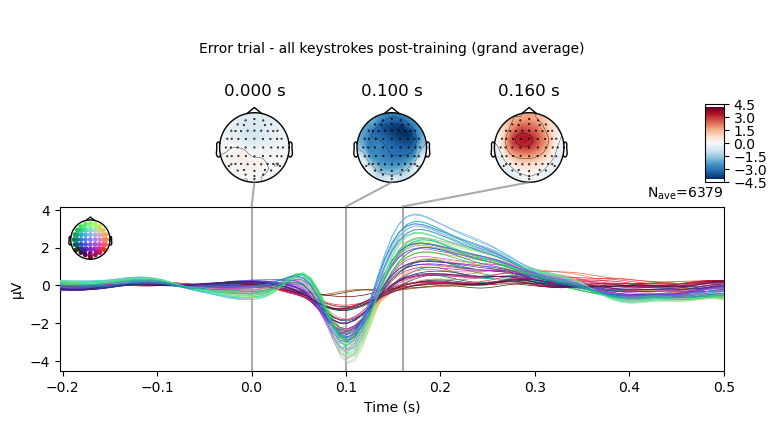

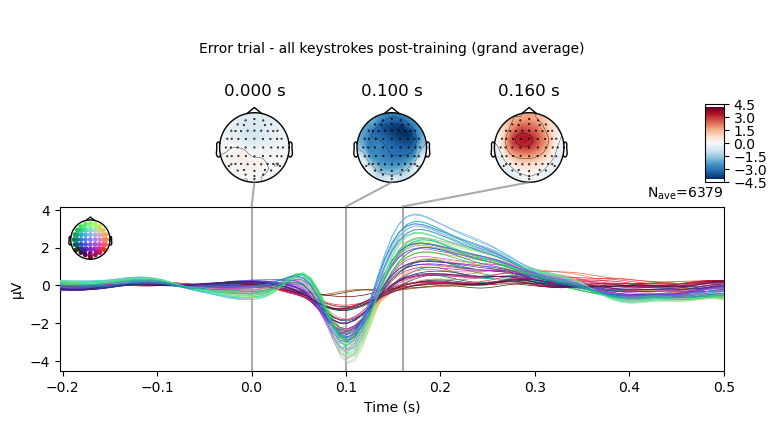

In [5]:
concat_evoked['pre']['all'].plot_joint(times =[ 0, 0.1, 0.16], title= f'Error trial - all keystrokes {period}-training (grand average)')

combining channels using "mean"
combining channels using "mean"


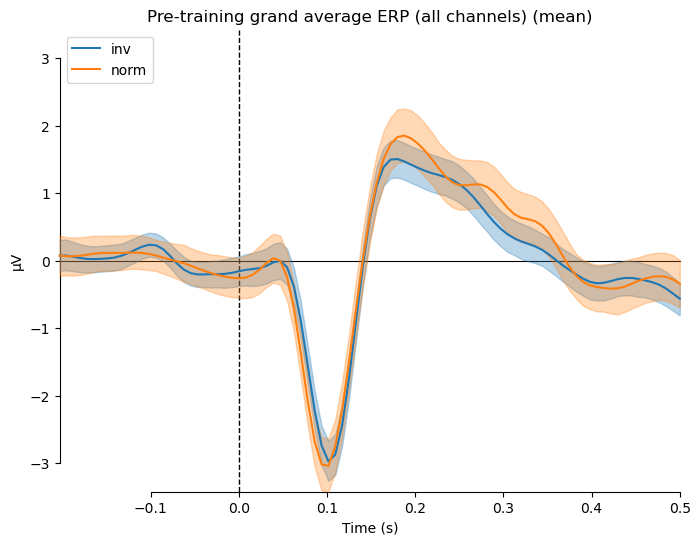

[<Figure size 800x600 with 1 Axes>]

In [6]:
erp_pre = dict(
        inv=list(concat_epochs['inv']['pre'].iter_evoked()),
        #shinv=list(concat_epochs['shinv']['pre'].iter_evoked()),
        norm=list(concat_epochs['norm']['pre'].iter_evoked())
       )
mne.viz.plot_compare_evokeds(erp_pre, title = 'Pre-training grand average ERP (all channels)',combine = 'mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


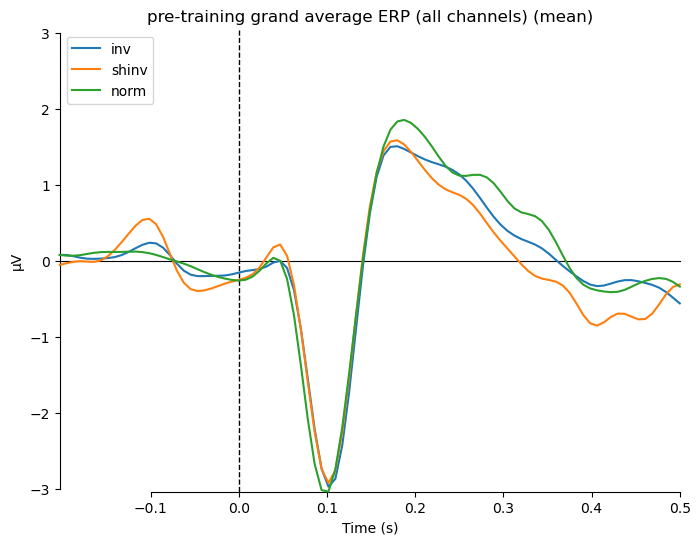

[<Figure size 800x600 with 1 Axes>]

In [7]:
erp_pre = dict(
        inv=list(concat_epochs['inv']['pre'].iter_evoked()),
        shinv=list(concat_epochs['shinv']['pre'].iter_evoked()),
        norm=list(concat_epochs['norm']['pre'].iter_evoked())
       )
mne.viz.plot_compare_evokeds(erp_pre, title = 'pre-training grand average ERP (all channels)',combine = 'mean', ci = False)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


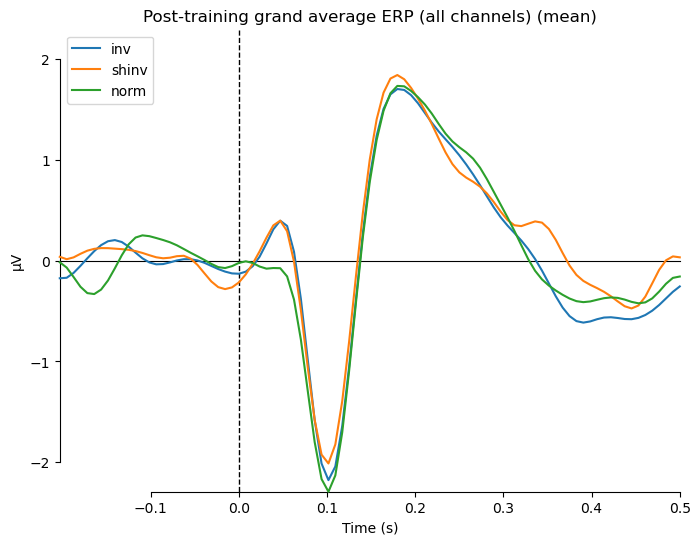

[<Figure size 800x600 with 1 Axes>]

In [8]:
erp_post = dict(
        inv=list(concat_epochs['inv']['post'].iter_evoked()),
        shinv=list(concat_epochs['shinv']['post'].iter_evoked()),
        norm=list(concat_epochs['norm']['post'].iter_evoked())
       )
mne.viz.plot_compare_evokeds(erp_post, title = 'Post-training grand average ERP (all channels)',combine = 'mean', ci = False)

#### Stats

In [9]:
#     PREPARING DATA
#############################

""" 
Saving data from different conditions to different variables. For example, test_inv_pre
"""
# List of keys to iterate over
outer_keys = ['all', 'inv', 'shinv', 'norm']
inner_keys = ['pre', 'post']

# Iterate over outer and inner keys
for outer_key in outer_keys:
    for inner_key in inner_keys:
        # Construct variable name dynamically
        var_name = f"test_{outer_key}_{inner_key}"
        # Access value using the keys
        value = concat_epochs[outer_key][inner_key].get_data()
        # Assign to dynamically generated variable name
        locals()[var_name] = value

#time vector (assumes that everything has the same times, which should be the case)
erp_times = concat_epochs['all']['pre'].times


#### CHOOSING CONDITIONS TO COMPARE


In [64]:
to_compare = [test_norm_pre, test_norm_post]
map = 'norm'
#comparison = 'trained (inv) keystrokes pre and post'
plot_labels = [f'{map}, pre-training', f'{map}, post-training']

In [65]:
"""#prepare data
test_pre = concat_epochs_pre.get_data()
test_post = concat_epochs_post.get_data()"""

n_events = test_all_pre.shape[0]
n_channels = test_all_pre.shape[1]
n_timepoints = test_all_pre.shape[2]


#channels of interest
p_channels = ['Cz', 'FCz']
eeg_channels = ch_names_72[0:64]
p_ch_idx = ch_index(p_channels)

#CHOOSING CHANNELS TO TEST
ch_totest = p_channels #'all' or p_channels


#### Timepoint stats


In [66]:
def find_diff_sa(evoked_list1, evoked_list2):
    diff_evoked_list = [evoked1 - evoked2 for evoked1, evoked2 in zip(evoked_list1, evoked_list2)]
    diff_evoked_sa = np.stack(diff_evoked_list)
    return diff_evoked_sa

diff_evoked_sa = find_diff_sa(to_compare[0], to_compare[1])

In [78]:
diff_evoked_sa.shape

(842, 72, 91)

In [67]:
#calculate p-value over time
p_values = p_times(to_compare, channels = ch_totest)
p_within = p_times_1sample(diff_evoked_sa, channels = ch_totest)

Calculating p-value over ['Cz', 'FCz']
Calculating p-value over ['Cz', 'FCz']
Distribution is not normal. p =  3.6628432298105314e-195


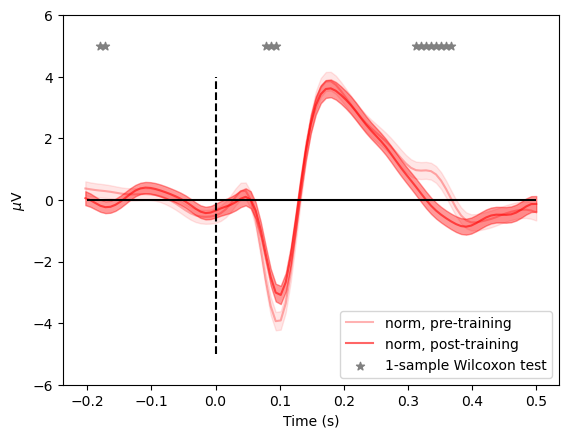

In [71]:
######################
# COMPARISON FIGURE
######################

plt.figure()

shade = 0.3
for i, data in enumerate(to_compare):

    if ch_totest == 'all':
        plt.title(f'Variable mapping ERP averaged over all channels ({comparison})')
        mean_data = data.mean(axis=0)[0:64].mean(axis = 0)
        sem_data = data.std(axis=0)[0:64].mean(axis = 0) / np.sqrt(data.shape[0])

    elif ch_totest == p_channels:

        plt.title(f'Variable mapping ERP averaged over {p_channels} channels comparing ({comparison})')
        mean_data = data.mean(axis=0)[p_ch_idx].mean(axis = 0)
        sem_data = data.std(axis=0)[p_ch_idx].mean(axis = 0) / np.sqrt(data.shape[0])


    #rescale data
    mean_data = np.array([x * 1000000 for x in mean_data])
    sem_data = np.array([x * 1000000 for x in sem_data])

    plt.plot(erp_times, mean_data, label = plot_labels[i], color = 'red', alpha = shade)
    plt.fill_between(erp_times, mean_data - sem_data, mean_data + sem_data, color = 'red', alpha=shade - 0.2)
    shade += 0.3


#############################
#plot significant points
###############################
#find timepoints where ERP is significantly different
sig_idx = [index for index, item in enumerate(p_within) if item < 0.05]

y = [5]*len(sig_idx)
plt.scatter(erp_times[sig_idx], y, marker="*", color='grey', label = '1-sample Wilcoxon test')


#aesthetics
plt.hlines(0, -0.2, 0.5, color = 'black')
plt.vlines(0, -5, 4, color = 'black', linestyles= '--')
plt.ylabel('$\mu$V')
plt.xlabel('Time (s)')
plt.ylim(-6,6)
plt.legend()
plt.title('')
plt.savefig(f'{figs_dir}/error_{map}_prepost.svg')


#### Channel stats


In [69]:
#choosing times where there are significant differences
timepoint  = 0.1
time_idx = min(range(len(erp_times)), key=lambda i: abs(erp_times[i] - timepoint))

#calculating p values over channels
p_values_ch = p_chs(to_compare, time_idx)

#scaling p values
p_values_ch_scaled = scale_p_channels(p_values_ch)




To do: put some text and a colourbar??


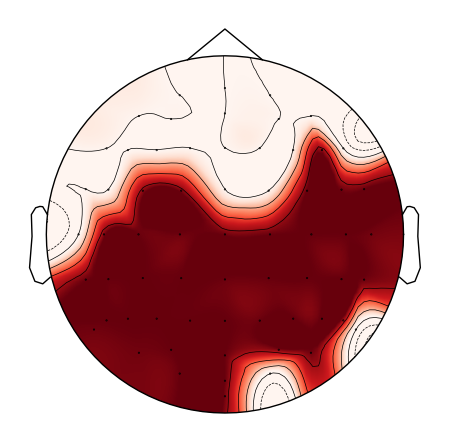

In [70]:

fig, axes = plt.subplots()  # Use plt.subplots() to create a figure and axes
im, cn = mne.viz.plot_topomap(p_values_ch_scaled, pos=concat_epochs['all']['pre'].info, size=4, cmap='Reds', axes=axes)  # Pass the axes object to the plot_topomap function
#axes.text(0.5, 0.1, "Your Text Here", fontsize=12, color='black', ha='center', va='center')
#fig.set_title('h')